In [1]:
import os
from scipy import misc

In [2]:
%pylab inline --no-import-all
from PIL import Image 

/Users/peterhirt/anaconda/envs/theano/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


In [ ]:
from ipywidgets import widgets  
from ipywidgets import interact

# testing

In [3]:
#path = 'patches/fibrosis/fibrosis_diffuse'
path = 'patches/consolidation/consolidation_non-relevant'
file_name = '105_slice_8_consolidation_non-relevant_4_1.bmp' 
image = misc.imread(os.path.join(path,file_name), flatten= 0)

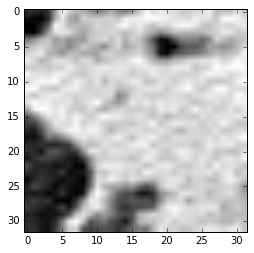

In [4]:
plt.imshow(Image.open(path + '/' + file_name)) 

# display category / sub-category images

In [7]:
# define the current work directory
cwd=os.getcwd()
cwd

'/Users/peterhirt/datascience/ild-cnn-master'

In [97]:
# create path to patch directory
patch_dir = os.path.join(cwd, 'patches')
category_list = (os.listdir(patch_dir))
print 'taking out the item : ', category_list.pop(0)
category_list

for category in category_list:
    category_dir = os.path.join(patch_dir, category)
    print category
    
    sub_category_list = (os.listdir(category_dir))
    for sub_category in sub_category_list:
        print sub_category
    print ''

taking out the item :  .DS_Store
consolidation
consolidation_apical
consolidation_diffuse
consolidation_non-relevant
consolidation_peripheral_sub_pleural

fibrosis
fibrosis_apical
fibrosis_basal
fibrosis_diffuse
fibrosis_non-relevant
fibrosis_perihilar
fibrosis_peripheral_sub_pleural

ground_class
ground_glass_apical
ground_glass_basal
ground_glass_diffuse
ground_glass_non-relevant
ground_glass_peripheral_sub_pleural

healthy
healthy_apical
healthy_non-relevant

micronodules
micronodules_diffuse
micronodules_non-relevant
micronodules_peripheral_sub_pleural

reticulation
reticulation_apical
reticulation_basal
reticulation_non-relevant
reticulation_peripheral_sub_pleural



# interactive part

In [224]:
# choose the dataset to look at

category_chosen = category_list[2]
print category_chosen

category_dir = os.path.join(patch_dir, category_chosen)

sub_category_list = (os.listdir(category_dir))

sub_category_chosen = sub_category_list[1]
print sub_category_chosen

ground_class
ground_glass_basal


In [225]:
images = []
category = category_chosen
    
category_dir = os.path.join(patch_dir, category)
# print  'the path into the categories is: ', category_dir
    
sub_categories_dir_list = (os.listdir(category_dir))
    
subCategory = sub_category_chosen
            
subCategory_dir = os.path.join(category_dir, subCategory) 
        
subCat = (os.listdir(subCategory_dir))
        
num_patches = 0       
for file in subCat:
                
    if file.find('.bmp') > 0:
                
        # load the .bmp file into array       
        image = misc.imread(os.path.join(subCategory_dir,file), flatten= 0)
        # append the array to the dataset list
                
        images.append(image)
        
        num_patches+=1
print 'found', num_patches, 'patches' 
        

found 185 patches


In [226]:
np.array(images).shape

(185, 32, 32, 3)

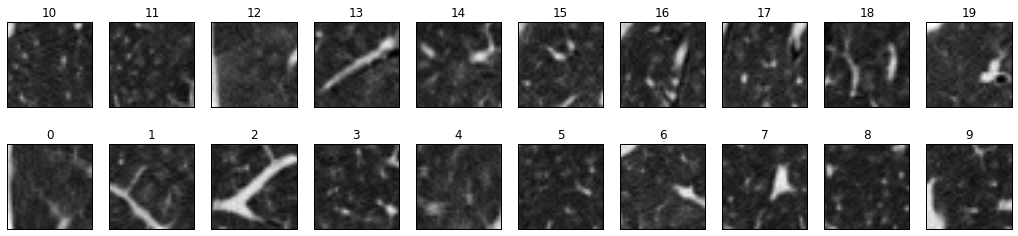

In [227]:
button = widgets.Button(description='next 20 patches')
display(button)



def on_button_clicked(b):

    print b
    fig = plt.figure()
    fig.set_size_inches(18, 8)
 
    for j in range(0,2):
        for i in  range(1,11):
    
            patch = fig.add_subplot(j+1,10,i)
        
    
            ind = (i+j*10-1)
            patch.set_title(str(ind))
            patch.axes.get_xaxis().set_visible(False)
            patch.axes.get_yaxis().set_visible(False)
       
            patch.imshow(images[ind]);
    
    
    
        
button.on_click(on_button_clicked)
   
        

In [212]:
def browse_images(images):
    n = len(images)
    def view_image(i):
        plt.imshow(images[i], cmap=plt.cm.gray_r, interpolation='nearest')
        plt.title('Training: %s' % i)
        plt.show()
    interact(view_image, i=(0,n-1))

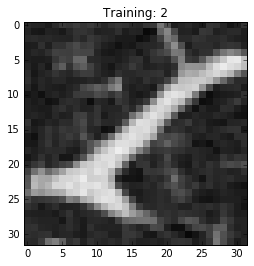

In [228]:
browse_images(images)